# **Capstone 1 - Satria Dirgantara N**

In [17]:
# Manipulasi Data
import pandas as pd

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Koneksi Database
import mysql.connector

# Warnings
import warnings
warnings.filterwarnings('ignore')

## **Connect to MySQL**

In [18]:
# Koneksi ke database MySQL
def connect_db():
    """
    Fungsi untuk mengkoneksikan ipynb ke database MySQL.
    """
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Bagas150902',
        database='gudang_stok'
    )
    return conn

## **Fetch data into a pandas DataFrame**

In [19]:
# Read Table
def read_table():
    """
    Fungsi untuk membaca tabel 'Products' dari database MySQL.
    """
    conn = connect_db()
    query = "SELECT * FROM Products"
    df = pd.read_sql(query, conn)
    conn.close()

    print('DATA TABEL PRODUCTS')
    print('=' * 60)
    print(df.to_string(index=False))
    print('=' * 60)
    return df


## **Show Statistic**

In [20]:
def show_statistics():
    """
    Regular function untuk Show Statistik 
    """
    df = read_table()
    
    print('\nSTATISTIK DESCRIPTIVE')
    print('=' * 50)
    print(f"Total Jenis Barang: {len(df)}")
    print(f"Rata rata Stok (Mean): {df['jumlah'].mean():.2f}")
    print(f"Median Stok: {df['jumlah'].median():.2f}")
    print(f"Total Stok Keseluruhan: {df['jumlah'].sum()}")
    print(f"Stok Tertinggi: {df['jumlah'].max()}")
    print(f"Stok Terendah: {df['jumlah'].min()}")
    print(f"Standar Deviasi: {df['jumlah'].std():.2f}")
    print('=' * 50)
    
    return df

## **Visualization For Categorical**

### **BarPlot**

In [21]:
def create_bar_plot(df):
    """
    Function untuk Data Visualization - Bar Plot
    """
    plt.figure(figsize=(12, 6))
    bars = plt.bar(df['nama'], df['jumlah'], color='skyblue', edgecolor='navy', alpha=0.7)
    
    plt.title('Bar Plot - Distribusi Stok Barang di Gudang', fontsize=16, fontweight='bold')
    plt.xlabel('Nama Barang', fontsize=12)
    plt.ylabel('Jumlah Stok', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Tambahkan nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

### **PieChart**

In [22]:
def create_pie_chart(df):
    """
    Function untuk Data Visualization - Pie Chart
    """
    plt.figure(figsize=(10, 8))
    colors = plt.cm.Set3.colors
    
    plt.pie(df['jumlah'], labels=df['nama'], autopct='%1.1f%%', 
            startangle=90, colors=colors, explode=[0.05]*len(df))
    plt.title('Pie Chart - Proporsi Stok Barang', fontsize=16, fontweight='bold')
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()

## **Visualization For Numerical**

In [23]:
def create_histogram(df):
    """
    Function untuk Data Visualization - Histogram untuk kolom numerical
    """
    
    plt.figure(figsize=(10, 6))
    plt.hist(df['jumlah'], bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.title('Histogram - Distribusi Frekuensi Stok Barang', fontsize=16, fontweight='bold')
    plt.xlabel('Jumlah Stok', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## **RUN ALL PROGRAM**

🚀 MEMULAI ANALISIS DATA GUDANG STOK
DATA TABEL PRODUCTS
 id  kode  nama  jumlah
  1 JR210 Jeruk     100
  2 CR200  Apel     200
DATA TABEL PRODUCTS
 id  kode  nama  jumlah
  1 JR210 Jeruk     100
  2 CR200  Apel     200

STATISTIK DESCRIPTIVE
Total Jenis Barang: 2
Rata rata Stok (Mean): 150.00
Median Stok: 150.00
Total Stok Keseluruhan: 300
Stok Tertinggi: 200
Stok Terendah: 100
Standar Deviasi: 70.71

📈 MEMBUAT VISUALISASI DATA


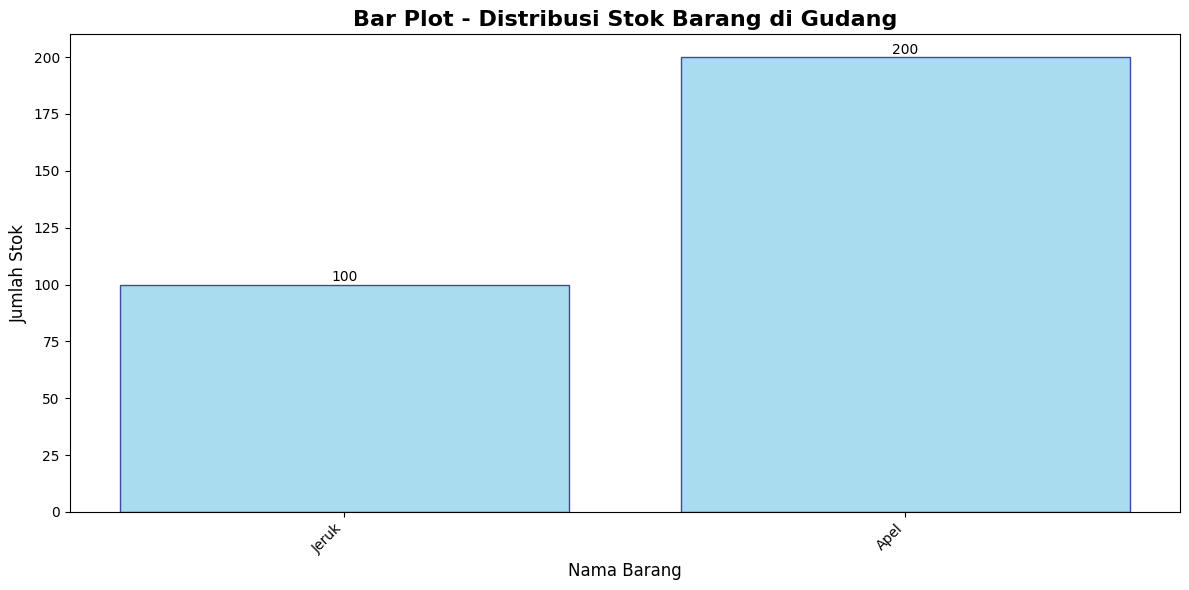

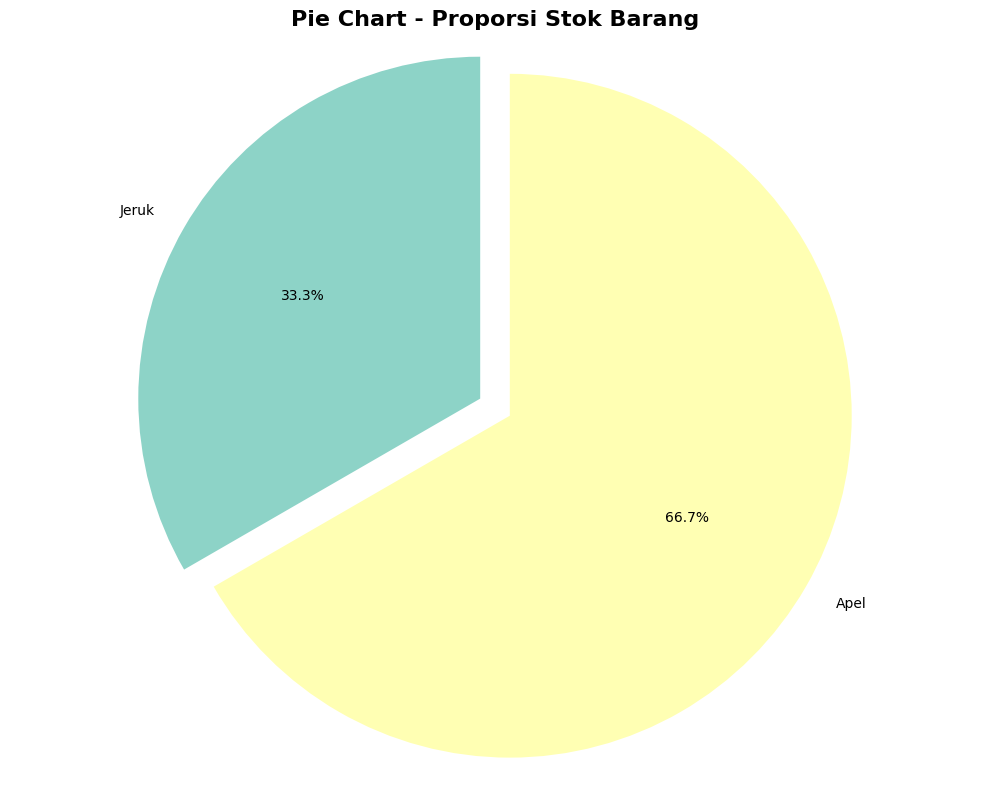

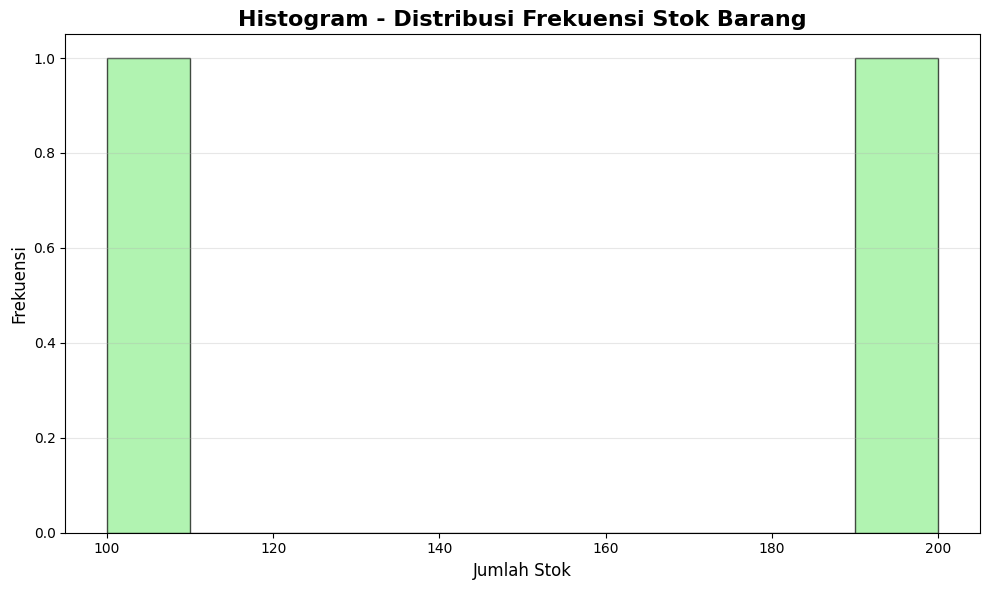

✅ ANALISIS SELESAI!


In [24]:
def run_all_analysis():
    """
    Function utama untuk menjalankan semua analisis
    """

    print('🚀 MEMULAI ANALISIS DATA GUDANG STOK')
    print('=' * 60)
    
    # 1. Read Table
    df = read_table()
    
    # 2. Show Statistics  
    df = show_statistics()
    
    # 3. Data Visualizations
    print('\n📈 MEMBUAT VISUALISASI DATA')
    create_bar_plot(df)
    create_pie_chart(df)
    create_histogram(df)
    
    print('✅ ANALISIS SELESAI!')

# Jalankan semua fungsi
run_all_analysis()